In [1]:
#Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset from CSV
df = pd.read_csv('winequality-red.csv')
# Exploratory Data Analysis (EDA)
# Let's take a quick look at the first few rows of the dataset
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
#Rename Columns
df = df.rename(columns={'fixed acidity': 'Fixed Acidity', 'volatile acidity': 'Volatile Acidity', 'citric acid': 'Citric Acid',
                        'residual sugar': 'Residual Sugar', 'chlorides': 'Chlorides', 'free sulfur dioxide': 'Free Sulfur Dioxide', 'total sulfur dioxide':'Total Sulfur Dioxide',
                        'density': 'Density', 'pH': 'pH', 'sulphates': 'Sulphates', 'alcohol': 'Alcohol', 'quality': 'Quality'})
print(df)

      Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      Free Sulfur Dioxide  

In [5]:
#Checking Null Value of Dataset
df.info()
df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed Acidity         1599 non-null   float64
 1   Volatile Acidity      1599 non-null   float64
 2   Citric Acid           1599 non-null   float64
 3   Residual Sugar        1599 non-null   float64
 4   Chlorides             1599 non-null   float64
 5   Free Sulfur Dioxide   1599 non-null   float64
 6   Total Sulfur Dioxide  1599 non-null   float64
 7   Density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   Sulphates             1599 non-null   float64
 10  Alcohol               1599 non-null   float64
 11  Quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Fixed Acidity           False
Volatile Acidity        False
Citric Acid             False
Residual Sugar          False
Chlorides               False
Free Sulfur Dioxide     False
Total Sulfur Dioxide    False
Density                 False
pH                      False
Sulphates               False
Alcohol                 False
Quality                 False
dtype: bool

In [ ]:
#Exploratory Data Analysis (EDA)

In [6]:
# Univariate Analysis
df.describe()

Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         Chlorides  Free Sulfur Dioxide  Total Sulfur Dioxide      Density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    Sulphates      Alcohol      Quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

<AxesSubplot:>

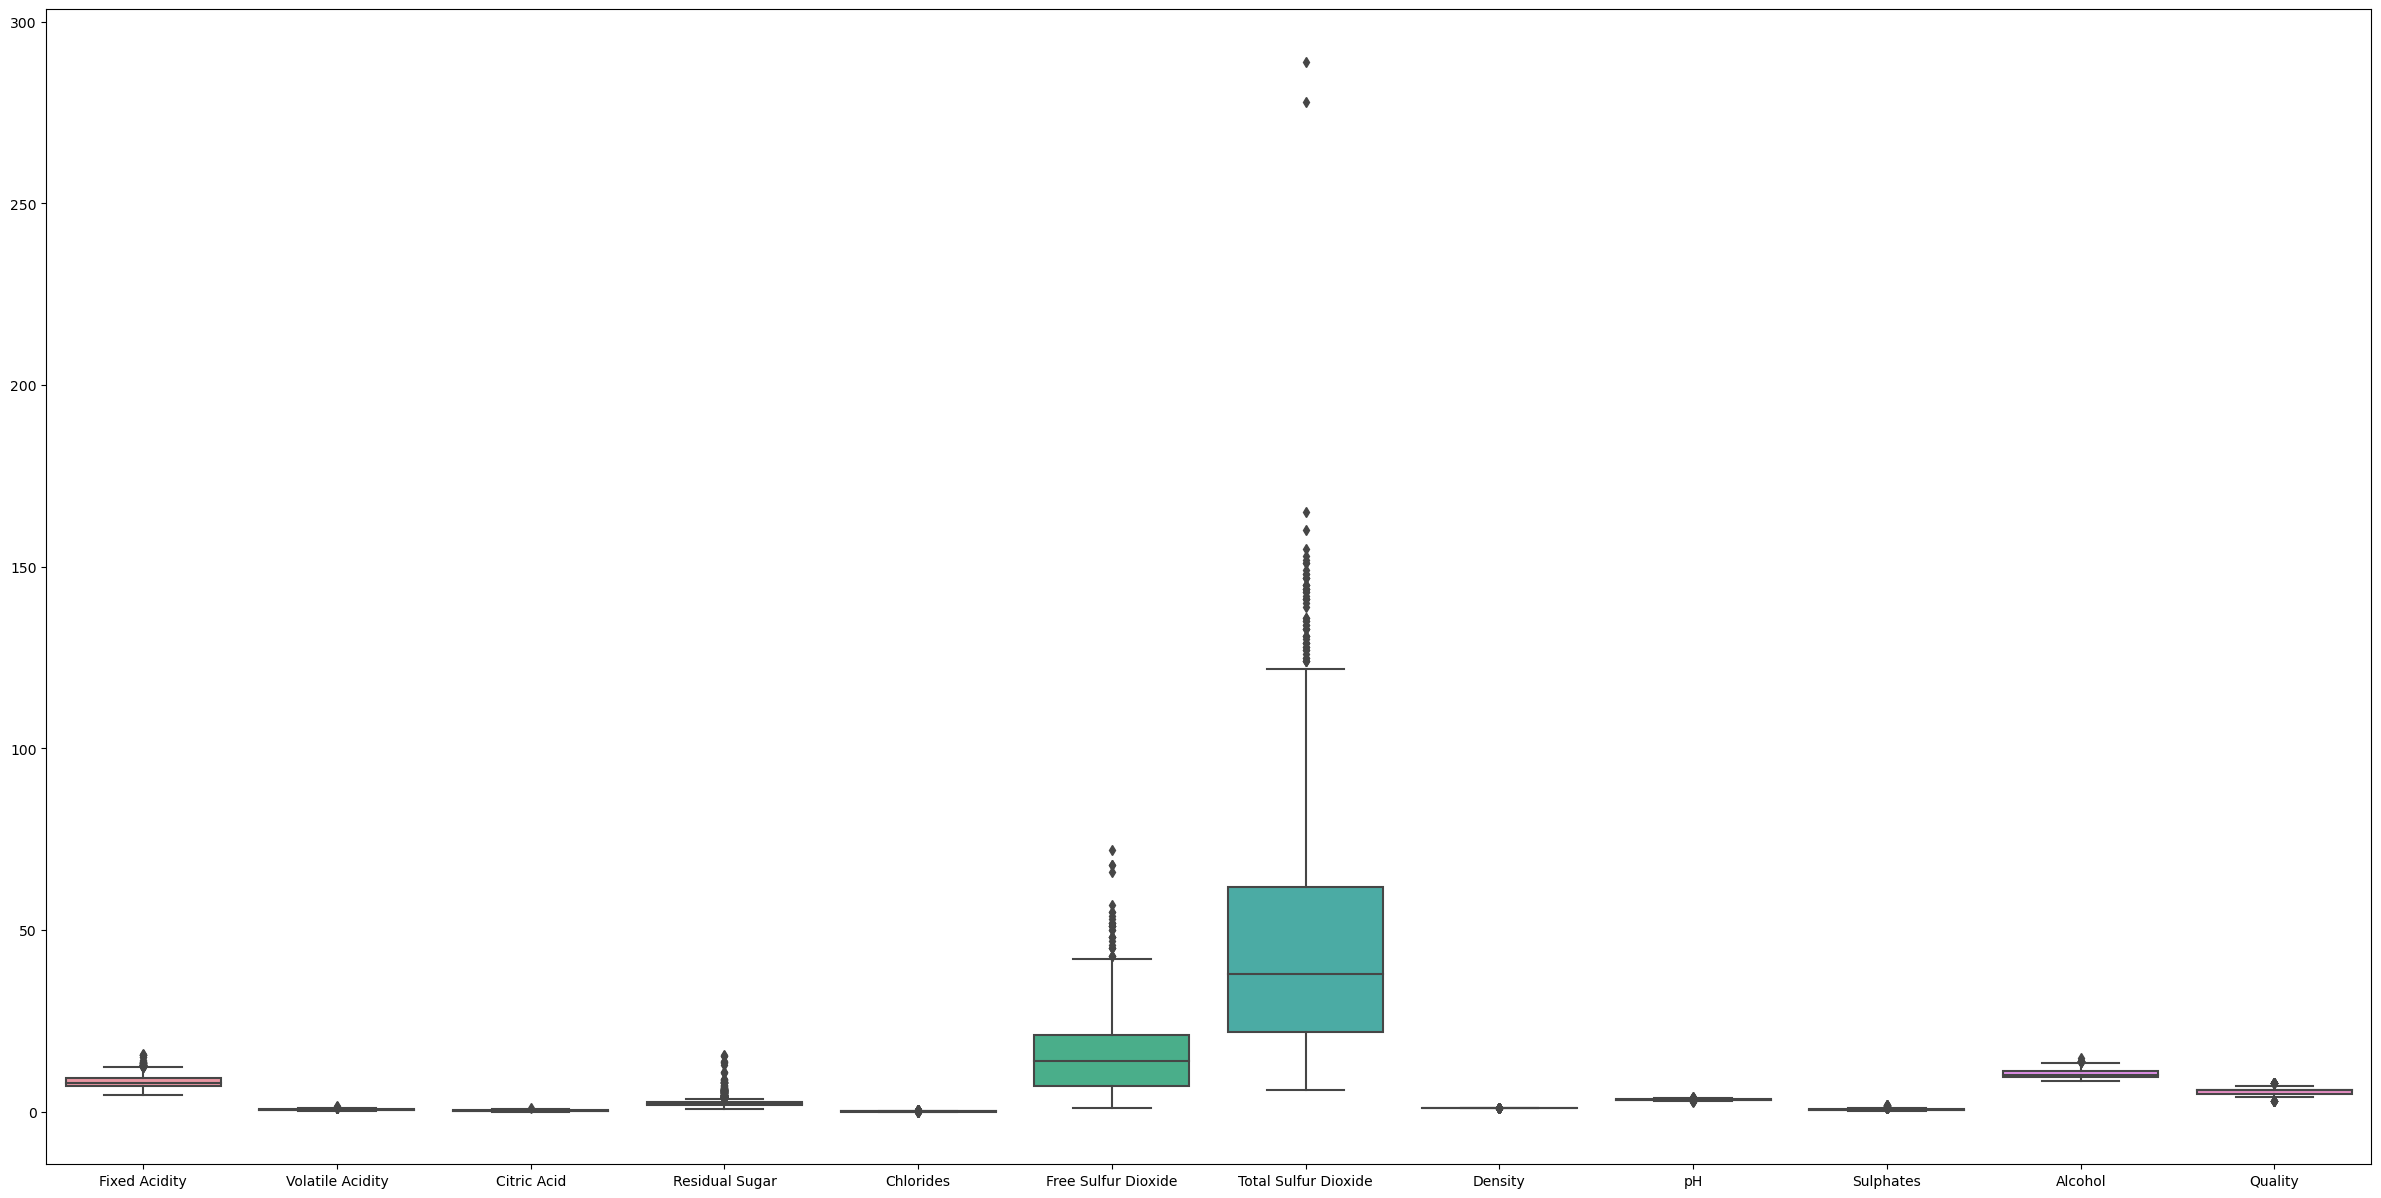

In [7]:
plt.figure(figsize=(30, 15))
sns.boxplot(data=df)

<AxesSubplot:>

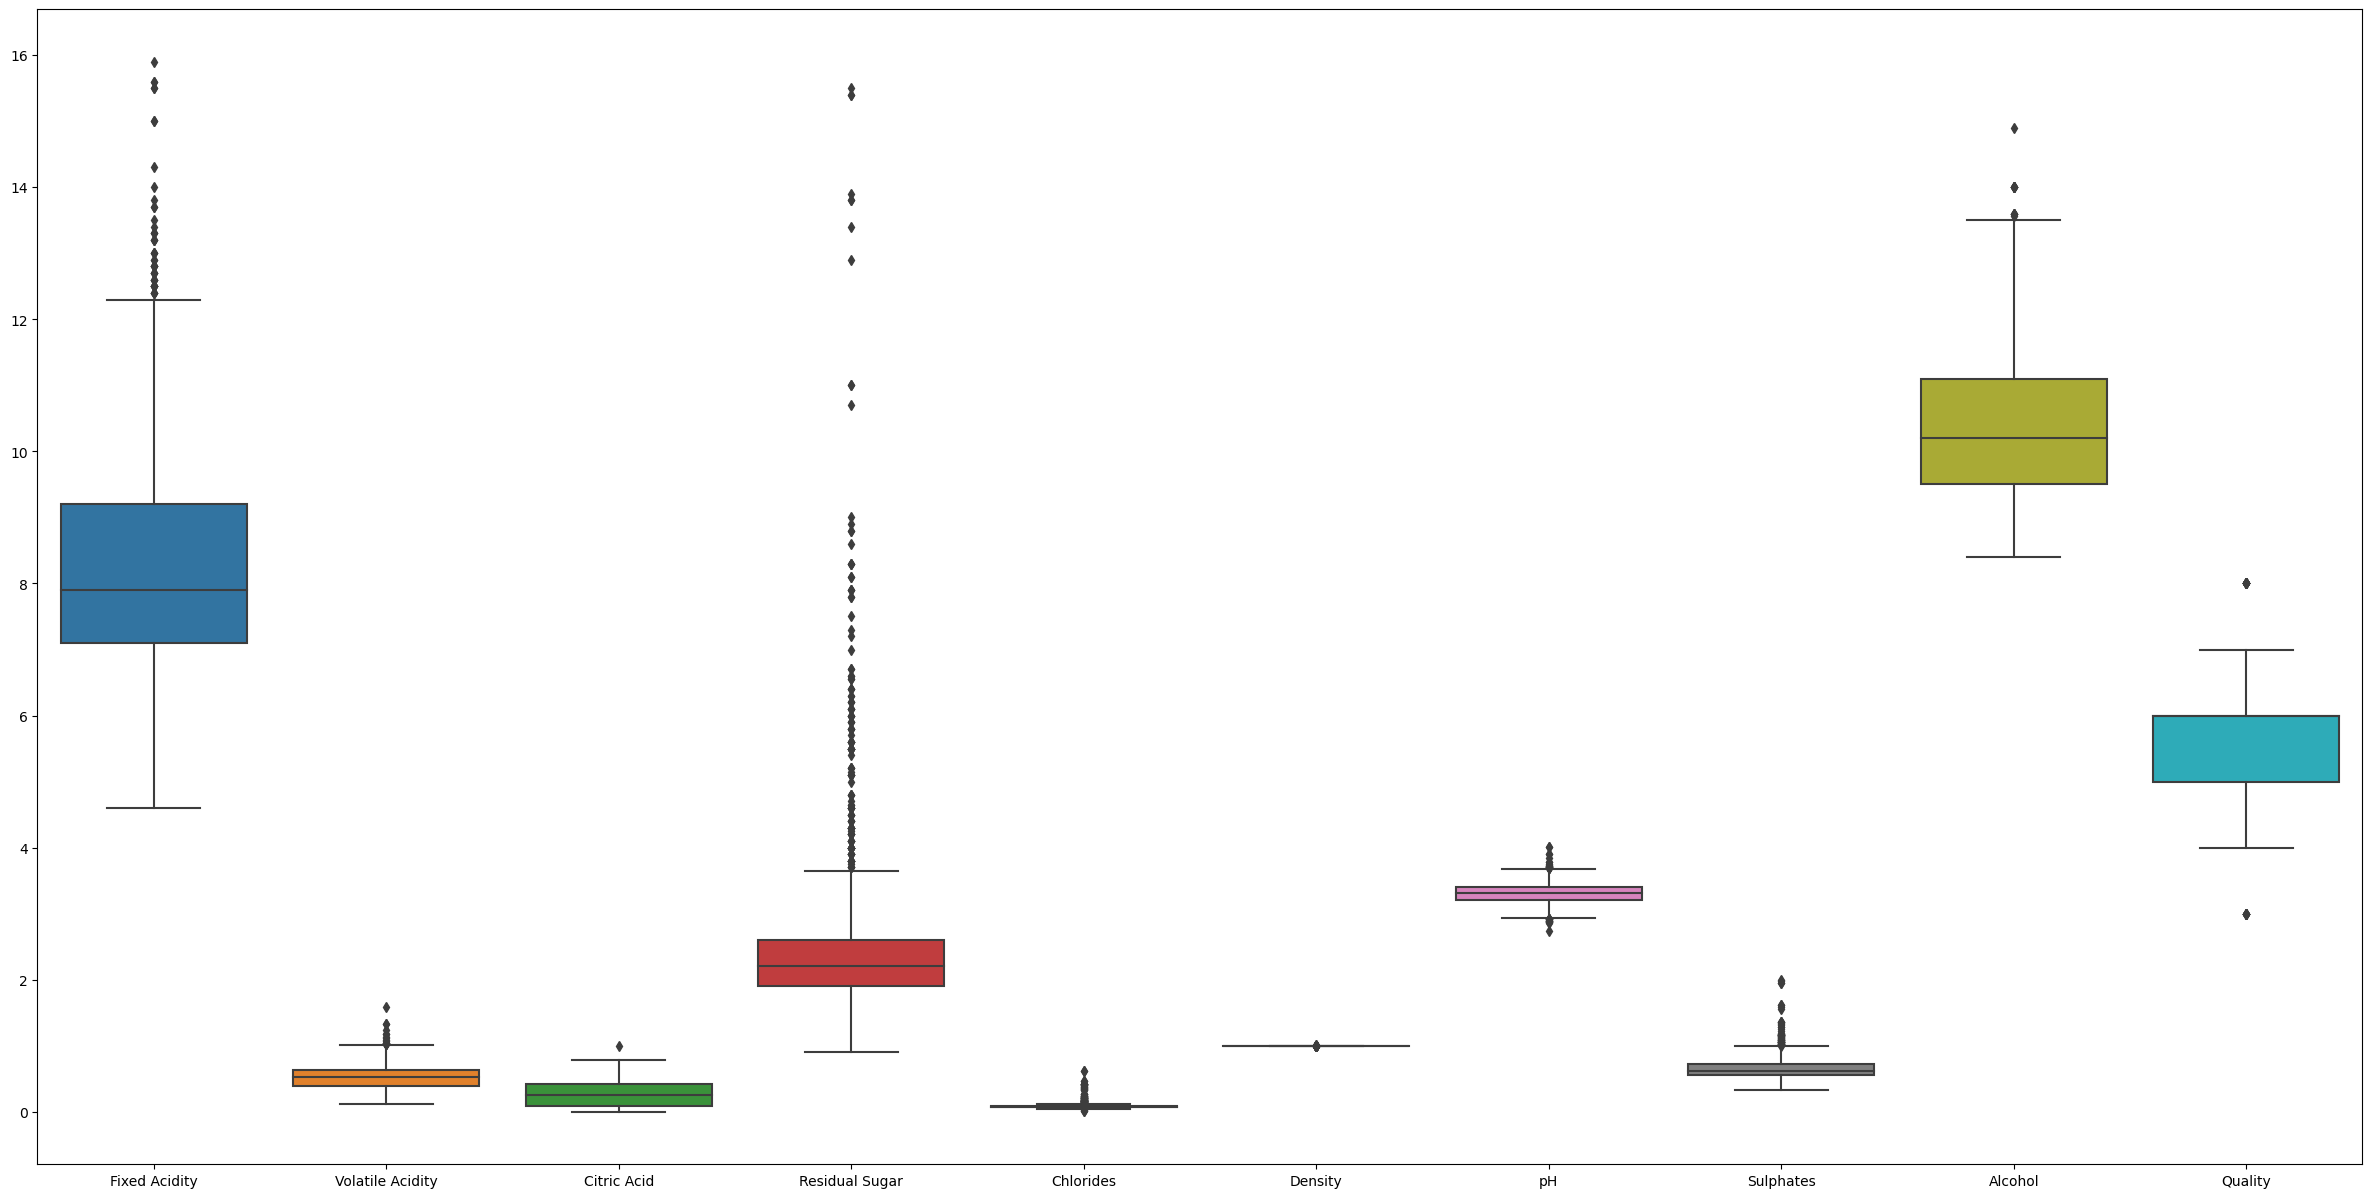

In [8]:
plt.figure(figsize=(30, 15))
zoom = df[['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Density', 'pH', 'Sulphates', 'Alcohol', 'Quality']]
sns.boxplot(data=zoom)

<Figure size 3000x1500 with 0 Axes>

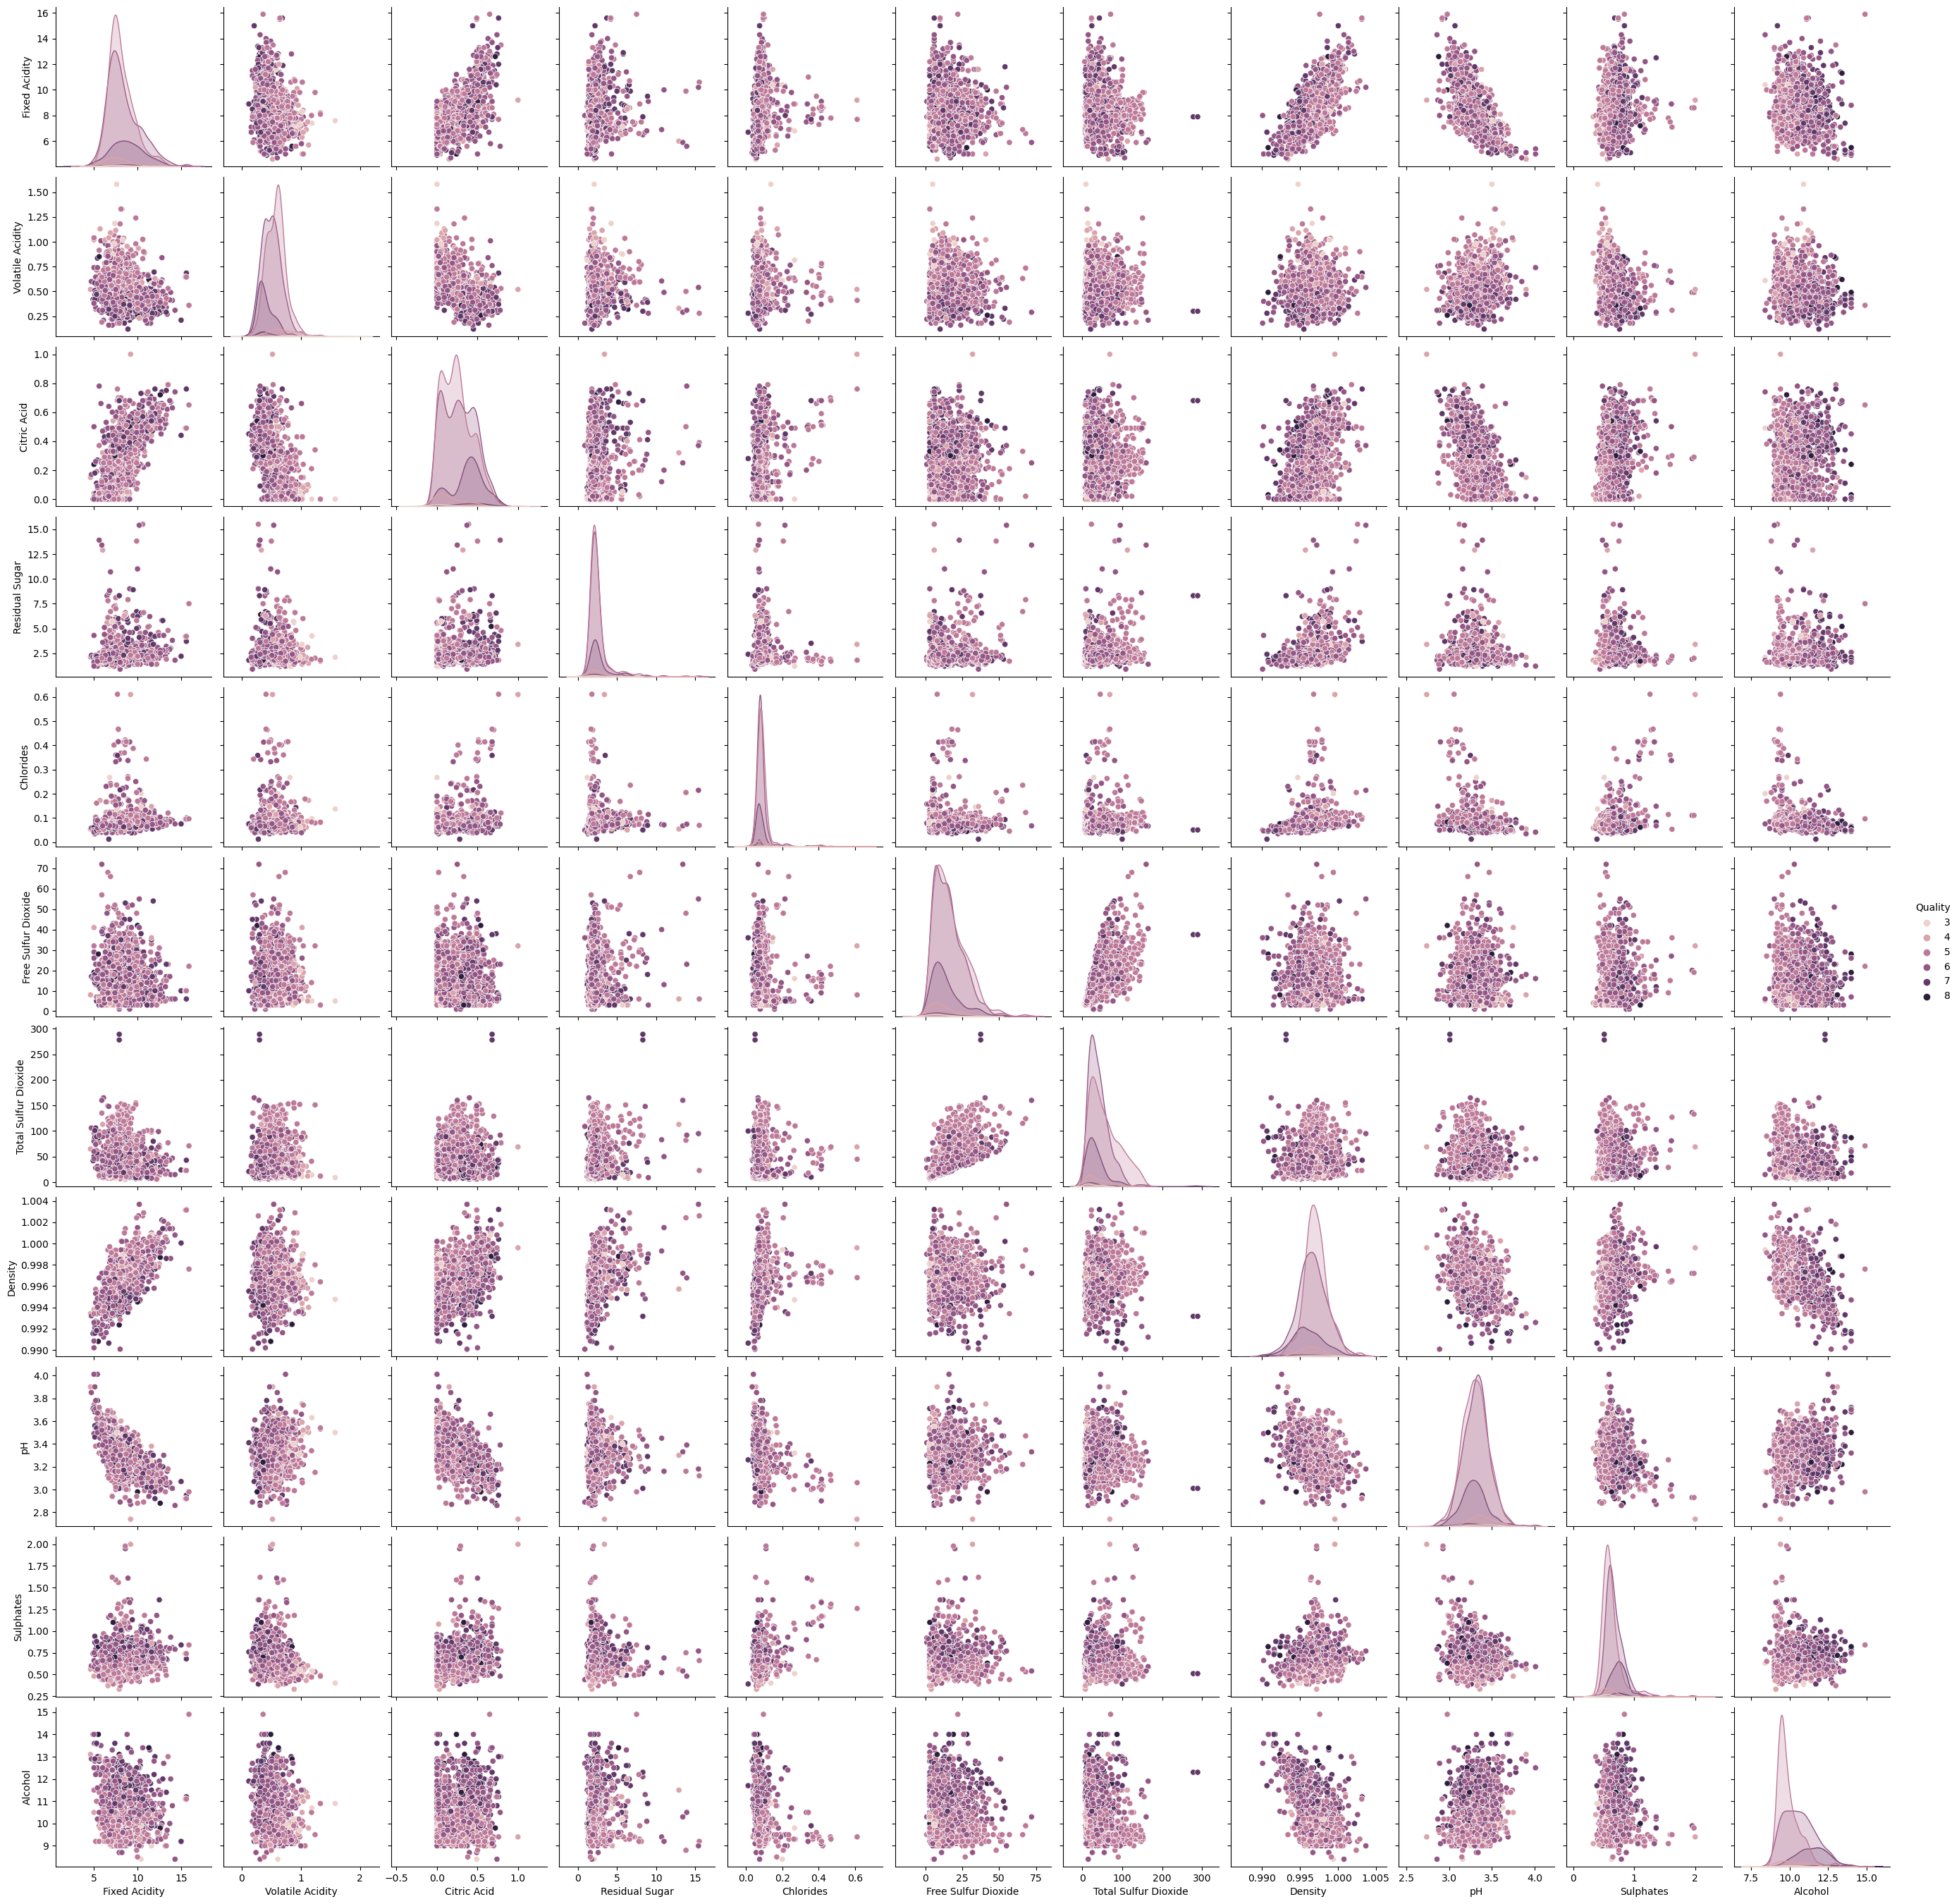

In [9]:
# Multivariate Analysis
plt.figure(figsize=(30, 15))
sns.pairplot(data=df, hue='Quality')
plt.show()

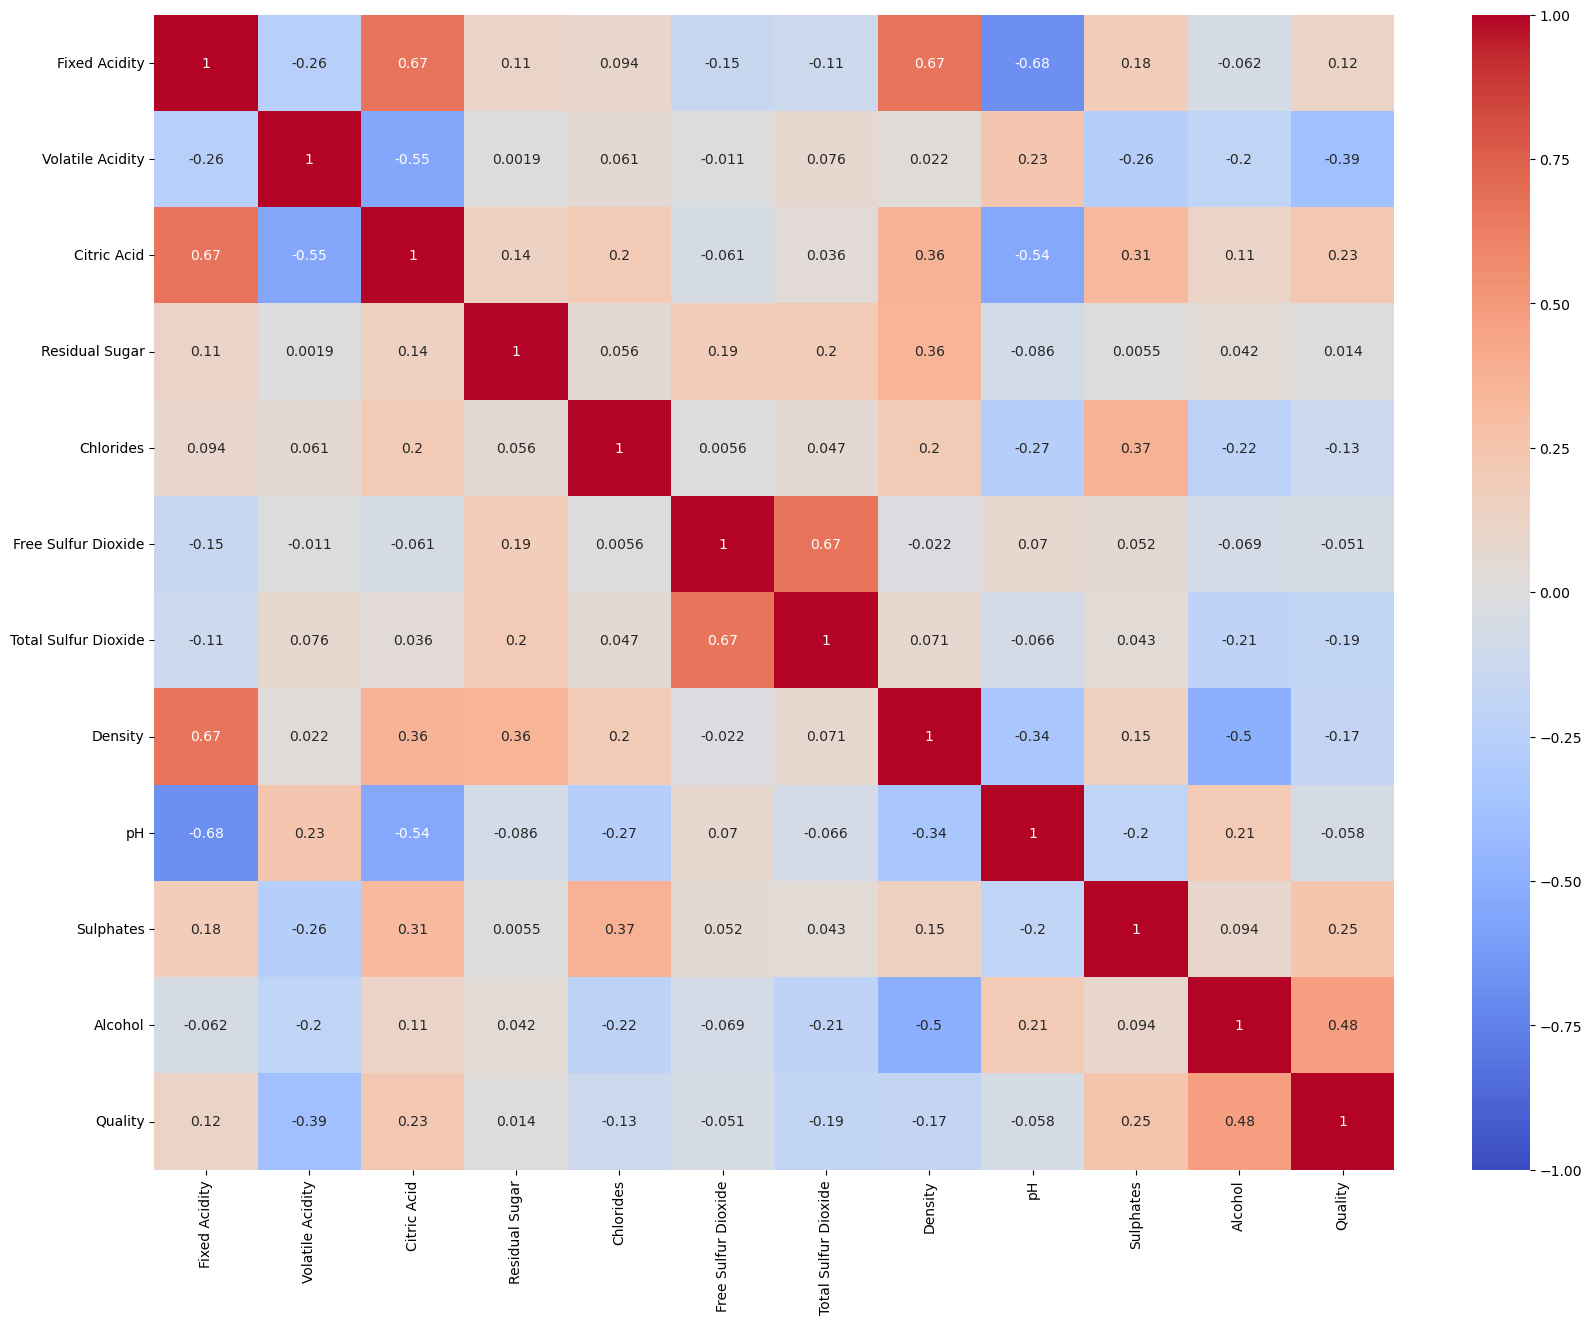

In [10]:
# Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True)
plt.show()

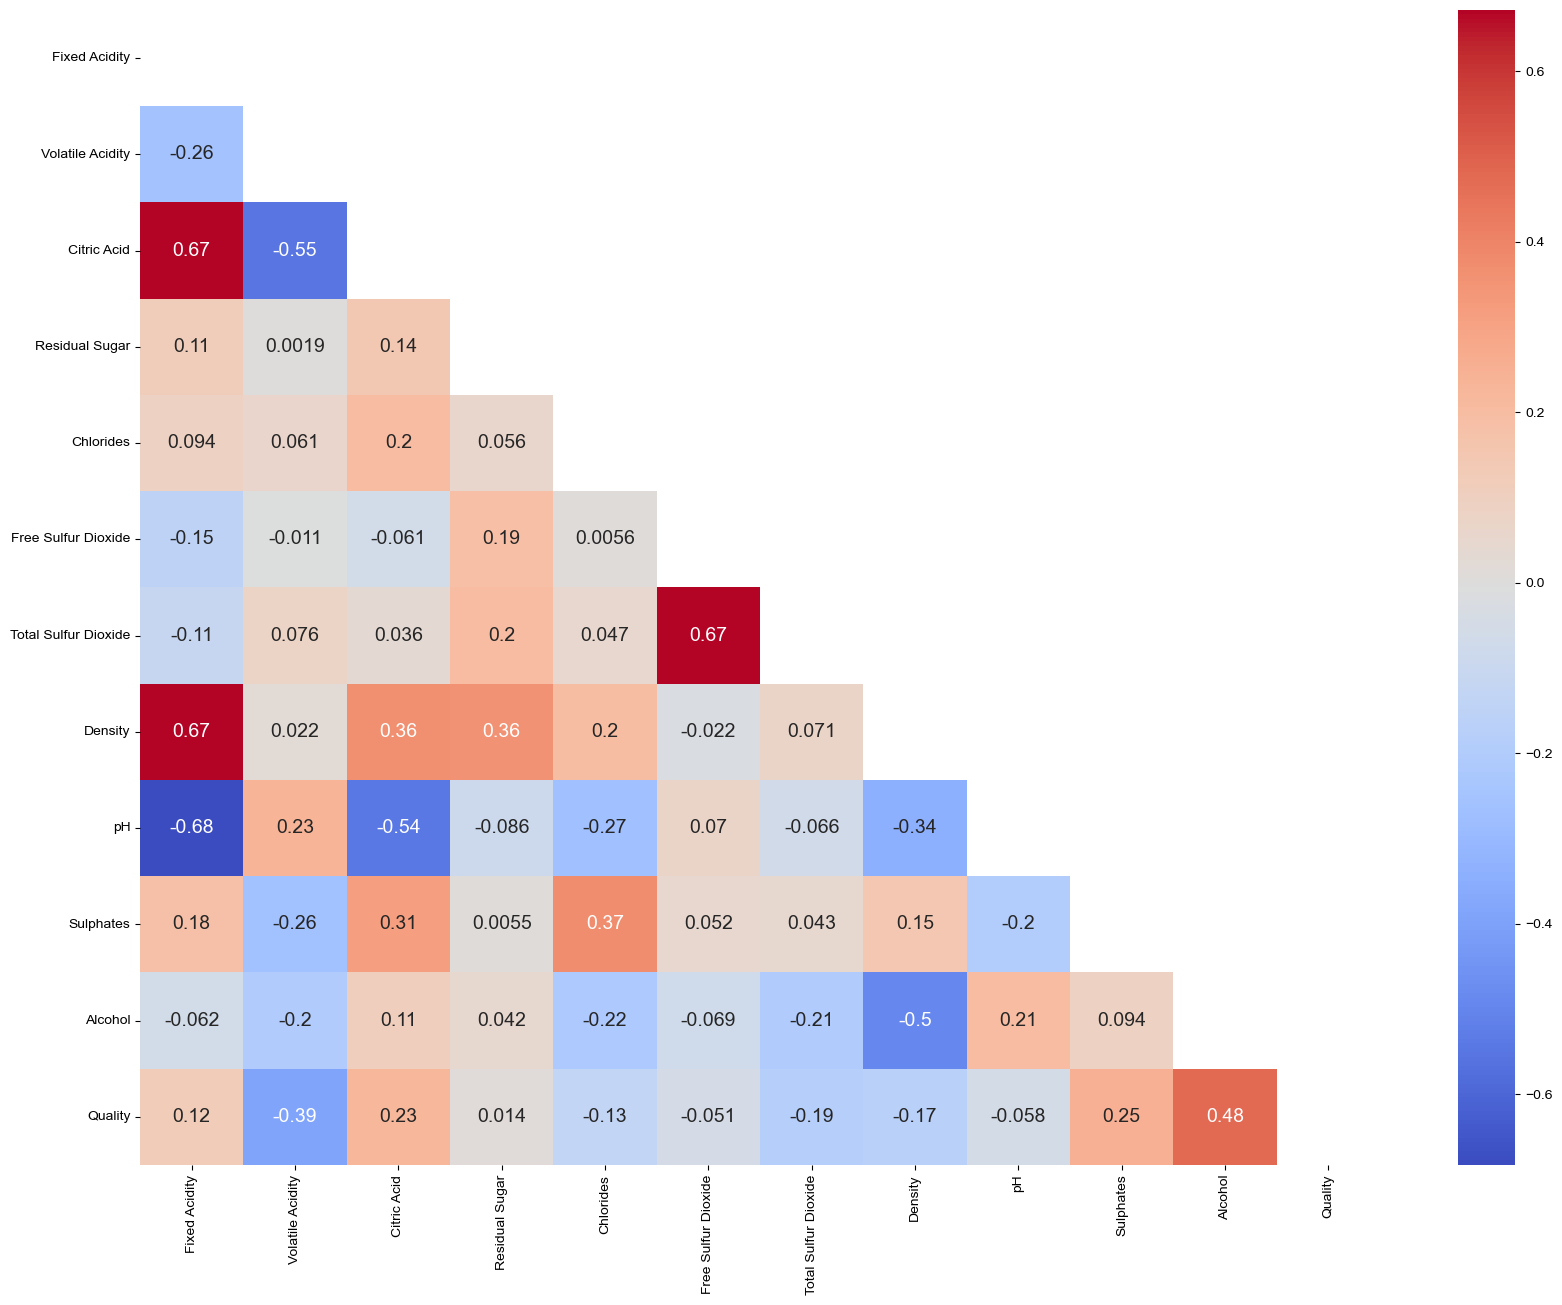

In [11]:
# Heatmap other display
# Creates an array of zeros
zero = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(zero)
zero[triangle_indices] = True
# Check the relationship between all the features with the target (Quality)
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), mask=zero, cmap="coolwarm", annot=True, annot_kws={'size': 14})
sns.set_style('whitegrid')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
# In order of highest correlation (to Quality): Alcohol, Volatile Acidity, Sulphates, Citric Acid, Total Sulfur Dioxide, Density, Chlorides, Fixed Acidity, pH, Free Sulfur Dioxide, Residual Sugar

In [12]:
#Independent Variables & Dependent Variables
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
# Splitting dataset into training set & test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [13]:
# Fitting Multiple Linear Regression to the training set
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [14]:
# Fitting Multiple Linear Regression to the training set
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [15]:
#Prediction

# Test prediction (From Fixed Acidity, Volatile Acidity, Citric Acid, Residual Sugar, Chlorides, Free Sulfur Dioxide, Total Sulfur Dioxide, Density, pH, Sulphates, Alcohol)
print(regr.predict([[15, 0.01, 0, 5, 0.001, 30, 50, 0.95, 3, 0.9, 15]]))
# Quality: 9.82988592 (9 out of 10)

[9.82988592]


In [16]:
#Evaluation

# Ordinary Least Square (OLS) Principle
x = sm.add_constant(x_train)
model = sm.OLS(y_train, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     66.34
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          6.26e-117
Time:                        16:36:54   Log-Likelihood:                -1268.8
No. Observations:                1279   AIC:                             2562.
Df Residuals:                    1267   BIC:                             2624.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.9987     23.831      1.469      0.1

In [17]:
# Evaluate our model using MSE criterion
y_pred = regr.predict(x_test)
print("Mean Squared Error (MSE): ", mean_squared_error(y_test, y_pred))

Mean Squared Error (MSE):  0.3844711978201245


In [18]:
# Check quality value from dataset that is listed
print(df['Quality'].unique())

[5 6 7 4 8 3]


In [19]:
# MAPE
def mape(actual, pred):
  actual, pred = np.array(actual), np.array(pred)
  return np.mean(np.abs((actual - pred) / actual)) * 100

In [20]:
mape(y_test, y_pred)
# Error of our model is approximately 8-9% (Excellent)
# MAPE result Notes : 
# 1. Below 10% = Excellent
# 2. 10% - 20% = Good
# 3. 21% - 50% = Reasonable
# 4. Above 50% = Inaccurate

8.781960464319942